In [6]:
import pandas a pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')


<h1>House Price Prediction</h1>

In [20]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
import pandas as pd

# If your CSV values are space-separated
boston = pd.read_csv(r"C:\Users\arath\Downloads\housing.csv", 
                     header=None, 
                     names=column_names,
                     delim_whitespace=True)  # <-- key fix

print("Boston Housing Dataset Loaded")
display(boston.head())


Boston Housing Dataset Loaded


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']


<h1> Train-Test Split</h1>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1>Train Linear Regression</h1>

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<h1>Predict and Evaluate</h1>

In [30]:
y_pred = lr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R² Score: 0.67


<h1>Plot Predicted vs Actual Values</h1>

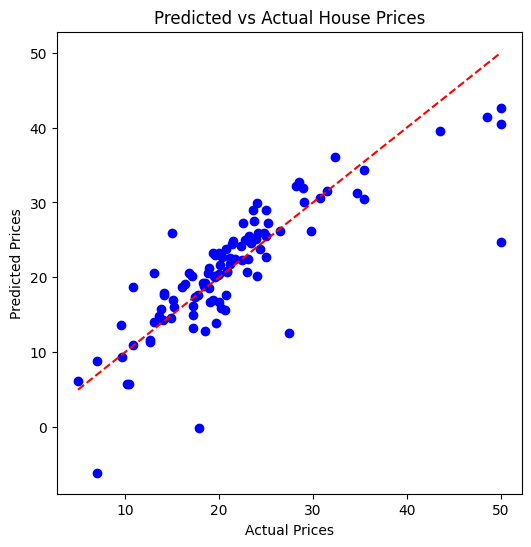

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()


<h1>Iris Classification</h1>

In [59]:
iris = pd.read_csv(r"C:\Users\arath\Downloads\Iris\Iris.csv")
print("Iris Dataset Loaded Successfully!")
display(iris.head())


Iris Dataset Loaded Successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
if 'Id' in iris.columns:
    iris = iris.drop('Id', axis=1)

X = iris.drop('Species', axis=1)
y = iris['Species']


<h1>Train-Test Split</h1>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1> Train Logistic Regression </h1>

In [38]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


<h1>Predict and Evaluate</h1>

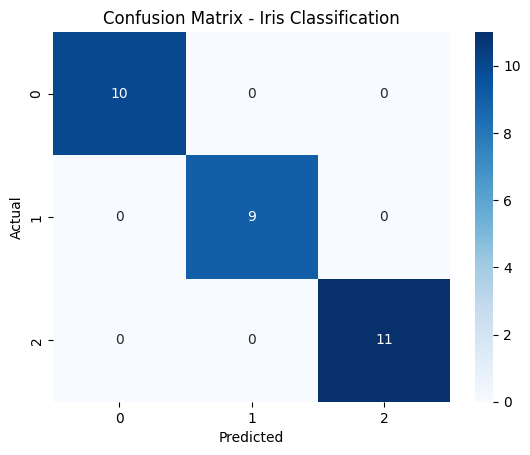

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [65]:
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Classification")
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


<h1>Decision Tree Classifier</h1>

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [71]:
file_path = r"C:\Users\arath\Downloads\Drugs\drug200.csv"  # replace if file name differs
df = pd.read_csv(file_path)


print(df.head())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [73]:
# Features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# If there are categorical variables, encode them
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features


In [75]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: 2/3 of temp -> validation (20% of total), 1/3 -> test (10% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 140
Validation samples: 40
Test samples: 20


In [77]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<h1>Evaluate on Validation Data</h1>

In [79]:
y_val_pred = dt_model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

val_cm = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:\n", val_cm)

val_report = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", val_report)


Validation Accuracy: 1.0
Validation Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]
Validation Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<h1>Evaluate on Test Data</h1>

In [81]:
y_test_pred = dt_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

test_cm = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:\n", test_cm)

test_report = classification_report(y_test, y_test_pred)
print("Test Classification Report:\n", test_report)


Test Accuracy: 0.95
Test Confusion Matrix:
 [[2 0 0 0 0]
 [1 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 5 0]
 [0 0 0 0 9]]
Test Classification Report:
               precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         2
       drugB       1.00      0.50      0.67         2
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         5
       drugY       1.00      1.00      1.00         9

    accuracy                           0.95        20
   macro avg       0.93      0.90      0.89        20
weighted avg       0.97      0.95      0.95        20

